## **Python SDK 방식**

* 내부적으로 HTTP 요청으로, roboflow API와 통신

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### 1. Settings

In [2]:
import os

base_dir = "/content/gdrive/MyDrive/Workspace/Colab"
src_dir = os.path.join(base_dir, "roboflow")

%cd $src_dir

/content/gdrive/MyDrive/Workspace/Colab/roboflow


In [3]:
!ls

 4.png	  ex1_roboflow_python_sdk.ipynb        requirements.txt
 demo-3  'ex2_RoboFlow_ HTTP_API_확인.ipynb'


In [4]:
!pip install -r requirements.txt > /dev/null

In [8]:
import getpass
import import_ipynb
from dotenv import load_dotenv

load_dotenv()

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY") or getpass.getpass("Enter your OPENAI_API_KEY: ")

if not ROBOFLOW_API_KEY:
    raise ValueError("ROBOFLOW API KEY not found in .env file.")

### 2. Apply Pytohn SDK

In [10]:
import roboflow

roboflow.login(force=True)
rf = roboflow.Roboflow()

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········




```
$ curl "https://api.roboflow.com/?api_key=$ROBOFLOW_API_KEY"
{
    "welcome": "Welcome to the Roboflow API.",
    "instructions": "You are successfully authenticated.",
    "docs": "https://docs.roboflow.com",
    "workspace": "roboflow"
}
```



In [13]:
# Private API Key
!curl "https://api.roboflow.com/?api_key={ROBOFLOW_API_KEY}"

{
    "welcome": "Welcome to the Roboflow API.",
    "instructions": "You are successfully authenticated.",
    "docs": "https://docs.roboflow.com",
    "workspace": "test-yghfc"
}

*사용자 입력 이름(test)을 바탕으로 워크스페이스의 URL이 자동으로 생성됨 (프로젝트명도 동일)*

In [14]:
workspace = rf.workspace("test-yghfc")
print(workspace)

loading Roboflow workspace...
{
  "name": "test",
  "url": "test-yghfc",
  "projects": [
    "test-yghfc/demo-e3hej"
  ]
}


In [15]:
project = workspace.project("demo-e3hej")
print(project)

loading Roboflow project...
{
  "name": "demo",
  "type": "object-detection",
  "workspace": "test-yghfc"
}


In [16]:
import json
import datetime


def datetime_converter(o):
  if isinstance(o, datetime.datetime):
    return o.isoformat()


project_vars = vars(project)
pretty_json = json.dumps(project_vars, default=datetime_converter, indent=4)
print(pretty_json)

{
    "_Project__api_key": "Dwv2VKhBSjUIC5FKABOx",
    "annotation": "helmet",
    "classes": {
        "head": 90,
        "person": 9,
        "helmet": 306
    },
    "colors": {
        "helmet": "#C7FC00"
    },
    "created": "2024-12-11T15:34:17.170000",
    "id": "test-yghfc/demo-e3hej",
    "images": 109,
    "name": "demo",
    "public": true,
    "splits": {
        "valid": 23,
        "test": 12,
        "train": 74
    },
    "type": "object-detection",
    "multilabel": false,
    "unannotated": 0,
    "updated": "2024-12-11T17:54:46.220000",
    "model_format": "undefined",
    "_Project__workspace": "test-yghfc",
    "_Project__project_name": "demo-e3hej"
}


In [17]:
# version(1) = 데이터셋 버전 v1
# 현재 학습은 v4
version = project.version(4)

print(version.images)
print(version.workspace)
print(version.id)
print(version.name)
print(json.dumps(vars(version), default=datetime_converter, indent=4))

163
test-yghfc
test-yghfc/demo-e3hej/4
demo
{
    "_Version__api_key": "Dwv2VKhBSjUIC5FKABOx",
    "name": "demo",
    "version": "4",
    "type": "object-detection",
    "augmentation": {
        "image": {
            "versions": 3
        },
        "flip": {
            "horizontal": true,
            "vertical": false
        }
    },
    "created": 1733939686.222,
    "id": "test-yghfc/demo-e3hej/4",
    "images": 163,
    "preprocessing": {
        "auto-orient": true,
        "resize": {
            "format": "Stretch to",
            "height": 640,
            "width": 640
        }
    },
    "splits": {
        "valid": 23,
        "test": 12,
        "train": 128
    },
    "model_format": "undefined",
    "workspace": "test-yghfc",
    "project": "demo-e3hej",
    "public": true,
    "colors": {
        "helmet": "#C7FC00"
    },
    "exports": [
        "yolov5pytorch"
    ],
    "model": null
}


In [ ]:
# # Train, Val, Test 모두 저장
# dataset = project.version(4).download("yolov8")
# print(dataset)
# dataset.location

Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to demo-3 in yolov8:: 100%|██████████| 34/34 [00:00<00:00, 120.97it/s]


In [18]:
model = project.version("4").model

print(model)
print(json.dumps(vars(model), default=datetime_converter, indent=4))

{
  "id": "demo-e3hej/4",
  "name": "demo",
  "version": "4",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}
{
    "_InferenceModel__api_key": "Dwv2VKhBSjUIC5FKABOx",
    "id": "test-yghfc/demo-e3hej/4",
    "dataset_id": "demo-e3hej",
    "version": "4",
    "colors": {
        "helmet": "#C7FC00"
    },
    "_ObjectDetectionModel__api_key": "Dwv2VKhBSjUIC5FKABOx",
    "name": "demo",
    "classes": null,
    "overlap": 30,
    "confidence": 40,
    "stroke": 1,
    "labels": false,
    "format": "json",
    "preprocessing": {
        "auto-orient": true,
        "resize": {
            "format": "Stretch to",
            "height": 640,
            "width": 640
        }
    },
    "base_url": "https://detect.roboflow.com/",
    "api_url": "https://detect.roboflow.com/demo-e3hej/4?api_key=Dwv2VKhBSjUIC5FKABOx&name=YOUR_IMAGE.jpg&overlap=30&confidence=40&stroke=1&labels=false&f

(578, 367)


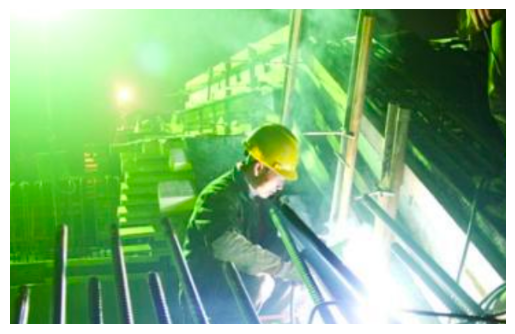

In [19]:
import matplotlib.pyplot as plt
from PIL import Image


img_path = "./4.png"

img = Image.open(img_path)
print(img.size)

plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
model.confidence = 30
model.overlap = 50

prediction = model.predict(img_path)

In [29]:
print(prediction)
print(vars(prediction))

{
  "x": 301.5,
  "y": 179.0,
  "width": 81.0,
  "height": 98.0,
  "confidence": 0.9417306780815125,
  "class": "helmet",
  "class_id": 1,
  "detection_id": "1ffd0f64-7a4e-4bce-9343-32b07d78472d",
  "image_path": "./4.png",
  "prediction_type": "ObjectDetectionModel"
}


{'predictions': [{
  "x": 301.5,
  "y": 179.0,
  "width": 81.0,
  "height": 98.0,
  "confidence": 0.9417306780815125,
  "class": "helmet",
  "class_id": 1,
  "detection_id": "1ffd0f64-7a4e-4bce-9343-32b07d78472d",
  "image_path": "./4.png",
  "prediction_type": "ObjectDetectionModel"
}], 'base_image_path': './4.png', 'base_prediction_type': 'ObjectDetectionModel', 'image_dims': {'width': '578', 'height': '367'}}


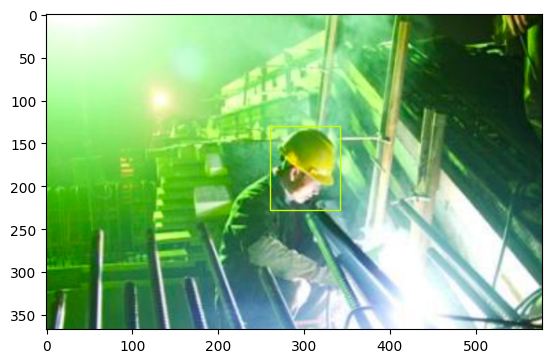

In [30]:
prediction.plot()

In [31]:
prediction.json()

{'predictions': [{'x': 301.5,
   'y': 179.0,
   'width': 81.0,
   'height': 98.0,
   'confidence': 0.9417306780815125,
   'class': 'helmet',
   'class_id': 1,
   'detection_id': '1ffd0f64-7a4e-4bce-9343-32b07d78472d',
   'image_path': './4.png',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '578', 'height': '367'}}